# Hough Transform
- A method for finding a **parametric model (description)** of objects in an image  
- Requires knowledge of the **analytical description of the target shape** during implementation  
- Used for detecting **simple objects** such as lines, ellipses, etc.  
- Advantage: **robustness** against irregularities and curve break

## Parametrization
- Line detection: $ r = x \cdot cos(\theta) + y \cdot sin(\theta) $  
  ![line](https://upload.wikimedia.org/wikipedia/commons/e/e6/R_theta_line.GIF)  
  <br>
- Circle detection: $ r^2 = (x - a)^2 + (y - b)^2 $  
  ![circle](https://www.cis.rit.edu/class/simg782.old/talkHough/circles1.gif)


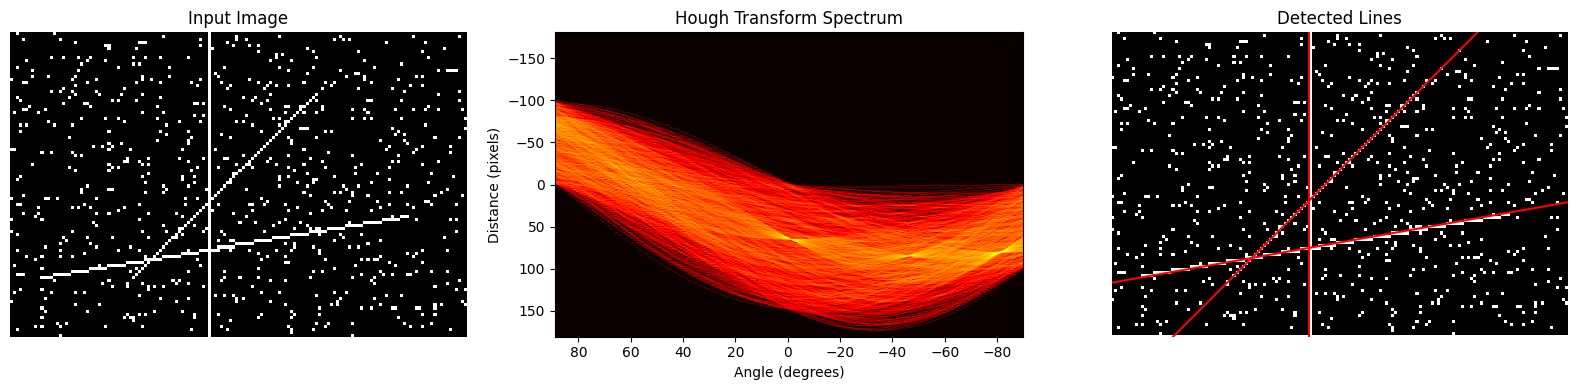

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, draw

# Empty binary image
img = np.zeros((100, 150), dtype=bool)

# Draw first line
img[:, 65] = True

# Draw second line
rr, cc = draw.line(20, 100, 80, 40)
img[rr, cc] = True

# Draw third line
rr, cc = draw.line(60, 130, 80, 10)
img[rr, cc] = True

# Add noise
img += (np.random.random(img.shape) > 0.95)

# Compute the Hough Transform
hspace, angles, dists = transform.hough_line(img)
hspace_peaks, angles_peaks, dists_peaks = transform.hough_line_peaks(hspace, angles, dists)

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Input image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Input Image')
axes[0].axis('off')

# Hough accumulator (spectrum)
axes[1].imshow(np.log(1 + hspace),
               extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]),
                       dists[-1], dists[0]), cmap='hot', aspect='auto')
axes[1].set_title('Hough Transform Spectrum')
axes[1].set_xlabel('Angle (degrees)')
axes[1].set_ylabel('Distance (pixels)')

# Detected lines
axes[2].imshow(img, cmap='gray')
for angle, dist in zip(angles_peaks, dists_peaks):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    axes[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='red')
axes[2].set_title('Detected Lines')
axes[2].set_xlim(0, img.shape[1])
axes[2].set_ylim(img.shape[0], 0)
axes[2].axis('off')

plt.tight_layout()
plt.show()


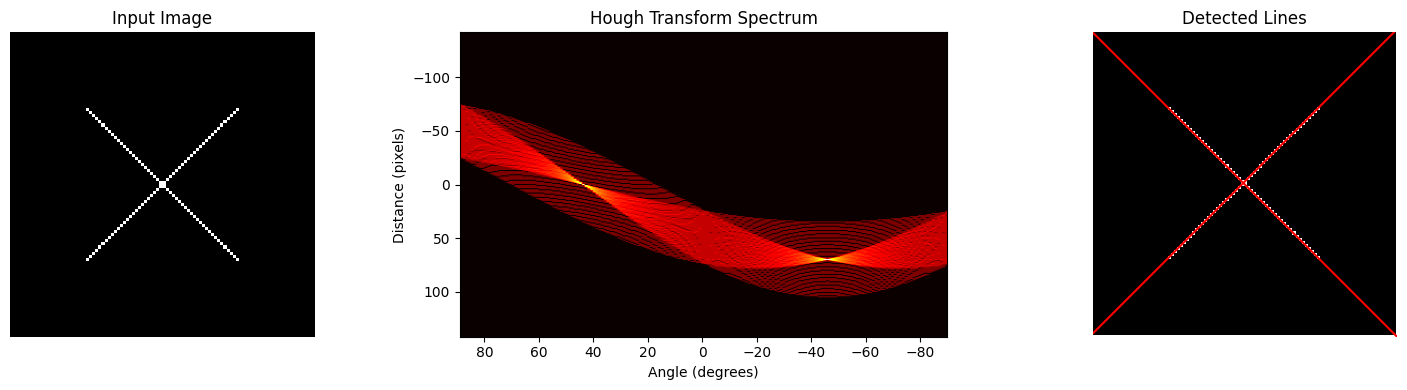

In [2]:
# Empty binary image
img = np.zeros((100, 100), dtype=bool)

# Draw two lines
idx = np.arange(25, 75)
img[idx[::-1], idx] = True
img[idx, idx] = True

# Compute the Hough Transform
hspace, angles, dists = transform.hough_line(img)
hspace_peaks, angles_peaks, dists_peaks = transform.hough_line_peaks(hspace, angles, dists)

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Input image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Input Image')
axes[0].axis('off')

# Hough accumulator (spectrum)
axes[1].imshow(np.log(1 + hspace),
               extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]),
                       dists[-1], dists[0]), cmap='hot', aspect='auto')
axes[1].set_title('Hough Transform Spectrum')
axes[1].set_xlabel('Angle (degrees)')
axes[1].set_ylabel('Distance (pixels)')

# Detected lines
axes[2].imshow(img, cmap='gray')
for angle, dist in zip(angles_peaks, dists_peaks):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    axes[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='red')
axes[2].set_title('Detected Lines')
axes[2].set_xlim(0, img.shape[1])
axes[2].set_ylim(img.shape[0], 0)
axes[2].axis('off')

plt.tight_layout()
plt.show()


## Let's try the transform on a real-world scenario

### 1. Line detection

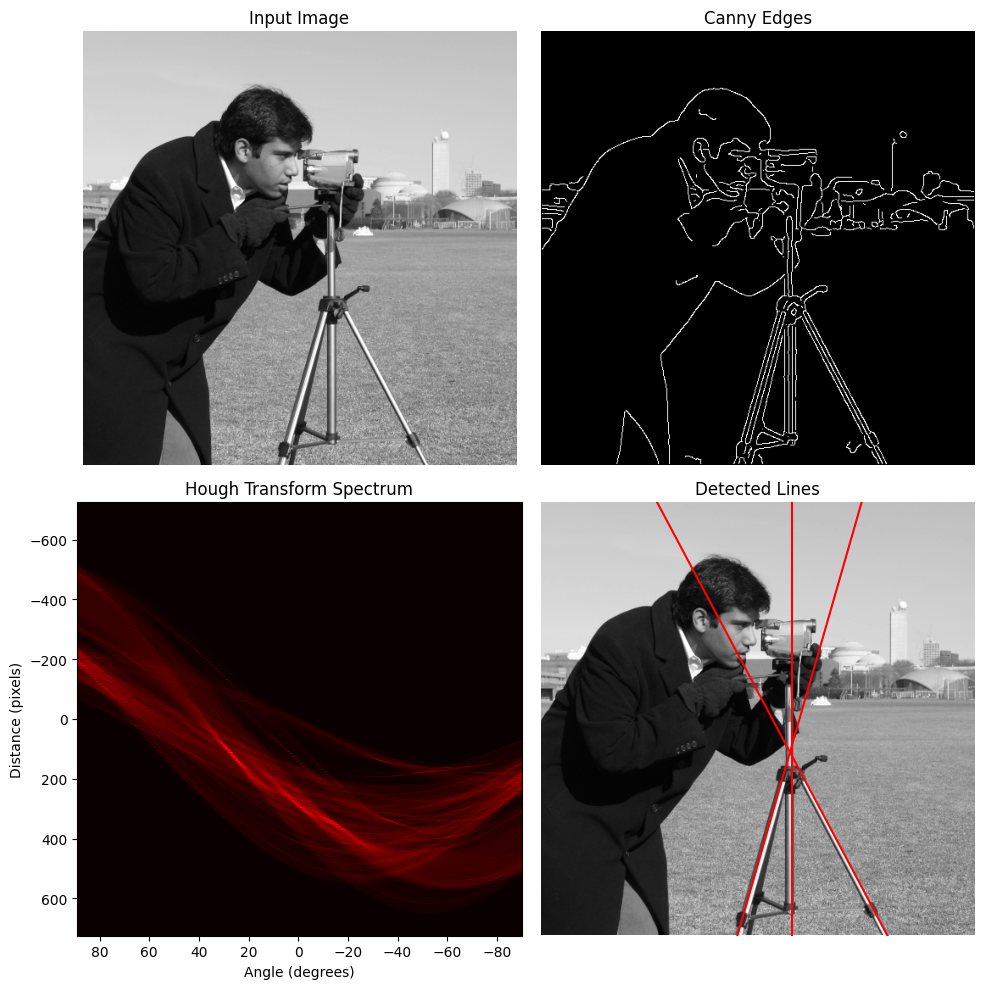

In [3]:
from skimage import data, feature

# Load the image and convert it to grayscale
img_gray = data.camera()

# Edge detection using Canny
edges = feature.canny(img_gray, sigma=2)

# Compute the Hough Transform
hspace, angles, distances = transform.hough_line(edges)

# Extract peaks from the Hough accumulator
accum, angles_peaks, dists_peaks = transform.hough_line_peaks(hspace, angles, distances)

# Create figure and axes 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Input image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Input Image')
axes[0, 0].axis('off')

# Canny edges
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Canny Edges')
axes[0, 1].axis('off')

# Hough accumulator (spectrum)
axes[1, 0].imshow(hspace, extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]),
                                  distances[-1], distances[0]), cmap='hot', aspect='auto')
axes[1, 0].set_title('Hough Transform Spectrum')
axes[1, 0].set_xlabel('Angle (degrees)')
axes[1, 0].set_ylabel('Distance (pixels)')

# Detected lines
axes[1, 1].imshow(img_gray, cmap='gray')
for angle, dist in zip(angles_peaks, dists_peaks):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    axes[1, 1].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='red')
axes[1, 1].set_title('Detected Lines')
axes[1, 1].set_xlim(0, img_gray.shape[1])
axes[1, 1].set_ylim(img_gray.shape[0], 0)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


### 2. Circle detection

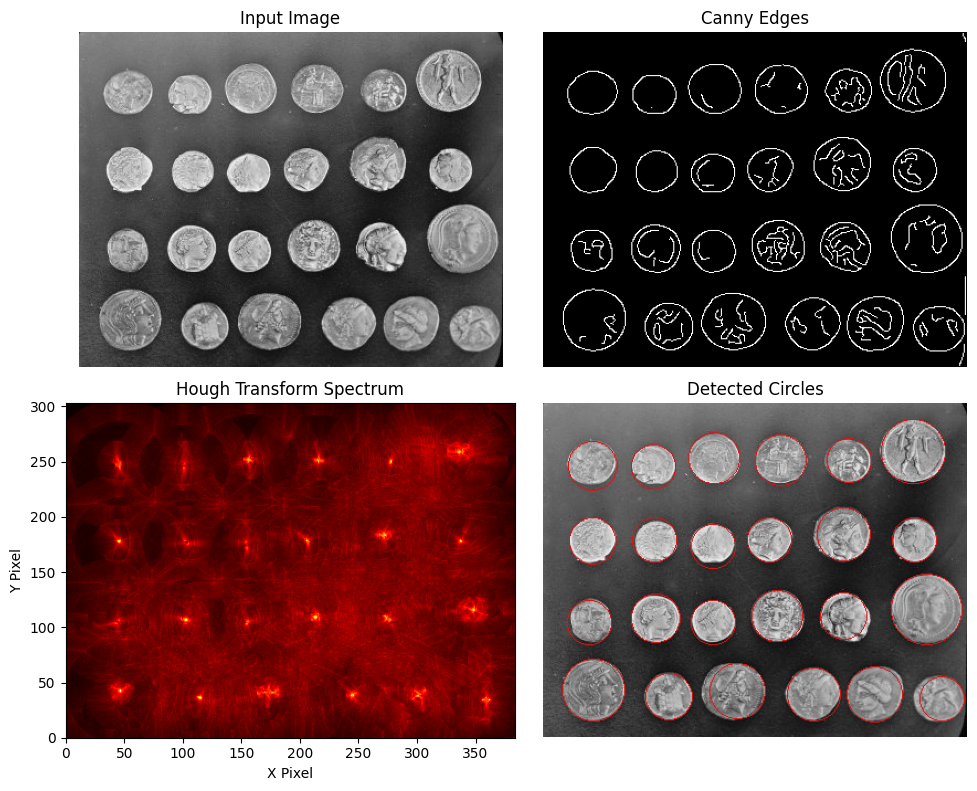

In [4]:
from PIL import Image

# Load the image and convert it to grayscale
img_gray = data.coins()

# Edge detection using Canny
edges = feature.canny(img_gray, sigma=2)

# Define the range of radii for circle detection
radii = np.arange(20, 40, 1)

# Compute the Hough Transform for circles
hspace = transform.hough_circle(edges, radii)

# Extract peaks from the Hough accumulator
accum, cx, cy, rad = transform.hough_circle_peaks(hspace, radii, total_num_peaks=40, min_xdistance=40, min_ydistance=40)

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Input image
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Input Image')
axes[0, 0].axis('off')

# Canny edges
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Canny Edges')
axes[0, 1].axis('off')

# Hough Transform Spectrum (Accumulator for circles)
axes[1, 0].imshow(np.max(hspace, axis=0), cmap='hot', extent=(0, img_gray.shape[1], 0, img_gray.shape[0]), aspect='auto')
axes[1, 0].set_title('Hough Transform Spectrum')
axes[1, 0].set_xlabel('X Pixel')
axes[1, 0].set_ylabel('Y Pixel')

# Detected circles (boundary lines only)
img_dets = np.array(Image.fromarray(img_gray.copy()).convert("RGB"))
for center_x, center_y, radius in zip(cx, cy, rad):
    # Draw the detected circle as a boundary line (not filled)
    rr, cc = draw.circle_perimeter(int(center_y), int(center_x), int(radius))
    
    # Ensure coordinates are within bounds
    rr = np.clip(rr, 0, img_gray.shape[0] - 1)
    cc = np.clip(cc, 0, img_gray.shape[1] - 1)

    # Plot the perimeter of the circle
    img_dets[rr, cc] = (220, 20, 20)

axes[1, 1].imshow(img_dets)
axes[1, 1].set_title('Detected Circles')
axes[1, 1].set_xlim(0, img_gray.shape[1])
axes[1, 1].set_ylim(img_gray.shape[0], 0)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


**Note**:  
Instead of using `min_xdistance` and `min_ydistance` to avoid nearby duplicate detections, you can apply a **Non-Maximum Suppression (NMS)** algorithm. NMS helps filter out overlapping or redundant detections by selecting only the most confident (strongest) candidates, leading to cleaner and more accurate results.
